In [296]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [297]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
import scipy.stats as st
import pingouin as pg

from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd

%matplotlib inline

In [298]:
data = pd.read_csv('test_data.csv')
data 

,Subject,Keyboard_layout,Input_method,Trial,Testing?,Seconds,WPM,AdjWPM,CPS,KSPS,...,Consc,UtilBand,WasteBand,|C|,|INF|,|IF|,|F|,|P|,|T|,|IS|
0,1,QUADRANT LAYOUT,Left-Right,1,1,464.514671,0.387501,0.326317,0.032292,0.036597,...,0.250000,0.750000,0.250000,15,3,1,1,18,16,18
1,1,QUADRANT LAYOUT,Left-Right,2,1,426.656145,0.534388,0.534388,0.044532,0.049220,...,1.000000,0.909091,0.090909,20,0,1,1,20,20,22
2,1,QUADRANT LAYOUT,Left-Right,3,1,269.877301,0.755899,0.713905,0.062992,0.062992,...,0.000000,0.944444,0.055556,17,1,0,0,18,18,18
3,1,QWERTY LAYOUT,Left-Right,1,1,311.515240,0.808949,0.772179,0.067412,0.067412,...,0.000000,0.954545,0.045455,21,1,0,0,22,22,22
4,1,QWERTY LAYOUT,Left-Right,2,1,414.189707,0.579445,0.531158,0.048287,0.057944,...,0.500000,0.769231,0.230769,20,2,2,2,22,21,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,12,QUADRANT LAYOUT,Free-roam,2,0,265.284064,0.678518,0.678518,0.056543,0.056543,...,1.000000,1.000000,0.000000,16,0,0,0,16,16,16
140,12,QUADRANT LAYOUT,Free-roam,3,0,374.319458,0.705280,0.674616,0.058773,0.058773,...,0.000000,0.956522,0.043478,22,1,0,0,22,23,23
141,12,QWERTY LAYOUT,Free-roam,1,0,201.181585,1.670133,1.036634,0.139178,0.139178,...,0.000000,0.620690,0.379310,18,11,0,0,18,29,29
142,12,QWERTY LAYOUT,Free-roam,2,0,380.714232,1.355347,0.790619,0.112946,0.133959,...,0.166667,0.461538,0.538462,24,20,4,4,28,44,52


In [299]:
df = data.copy()
df_grouped = df.groupby(by=['Subject','Keyboard_layout', 'Input_method'])[['WPM', 'TotErrRate']].mean().reset_index()
df_grouped

,Subject,Keyboard_layout,Input_method,WPM,TotErrRate
0,1,QUADRANT LAYOUT,Free-roam,0.395437,0.194497
1,1,QUADRANT LAYOUT,Left-Right,0.559263,0.104567
2,1,QWERTY LAYOUT,Free-roam,0.825256,0.168478
3,1,QWERTY LAYOUT,Left-Right,0.731102,0.093696
4,2,QUADRANT LAYOUT,Free-roam,0.407968,0.168350
5,2,QUADRANT LAYOUT,Left-Right,0.500654,0.104360
6,2,QWERTY LAYOUT,Free-roam,1.592487,0.537563
7,2,QWERTY LAYOUT,Left-Right,0.645725,0.059608
8,3,QUADRANT LAYOUT,Free-roam,0.746987,0.696970
9,3,QUADRANT LAYOUT,Left-Right,0.473820,0.054627


In [300]:
for depvar in ['WPM', 'TotErrRate']:
    
    stat, p = st.levene(df_grouped[depvar][df['Keyboard_layout'] == 'QUADRANT LAYOUT'],
                           df_grouped[depvar][df['Keyboard_layout'] == 'QWERTY LAYOUT'])
    print('Levene\'s Test: Statistics=%.3f, p=%.3f' % (stat, p),'for', depvar)

Levene's Test: Statistics=0.198, p=0.658 for WPM
Levene's Test: Statistics=0.310, p=0.580 for TotErrRate


In [301]:
for depvar in ['WPM','TotErrRate']:
# Peform the repeated measures ANOVA
    anova = AnovaRM(df_grouped, depvar=depvar, subject='Subject', within=['Keyboard_layout', 'Input_method'])
    res = anova.fit()
    
    print(depvar,'\nRepeated Measures',res,'\n')

WPM 
Repeated Measures                           Anova
                             F Value Num DF  Den DF Pr > F
----------------------------------------------------------
Keyboard_layout              35.3746 1.0000 11.0000 0.0001
Input_method                  8.5737 1.0000 11.0000 0.0137
Keyboard_layout:Input_method 41.1843 1.0000 11.0000 0.0000
 

TotErrRate 
Repeated Measures                           Anova
                             F Value Num DF  Den DF Pr > F
----------------------------------------------------------
Keyboard_layout               2.3873 1.0000 11.0000 0.1506
Input_method                  8.9536 1.0000 11.0000 0.0122
Keyboard_layout:Input_method  1.3338 1.0000 11.0000 0.2726
 


In [302]:
for depvar in ['WPM','TotErrRate']:
    # Compare 'WPM' means across different 'Typing_method' using Tukey's HSD test
    tukey = pairwise_tukeyhsd(endog=df_grouped[depvar],     # Data
                              groups=df_grouped['Input_method'],   # Groups
                              alpha=0.05)          # Significance level
    
    print(depvar,'Tukey\'s HSD test:\n',tukey,'\n')

WPM Tukey's HSD test:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2   meandiff p-adj   lower  upper  reject
----------------------------------------------------------
Free-roam Left-Right   -0.206 0.0525 -0.4143 0.0023  False
---------------------------------------------------------- 

TotErrRate Tukey's HSD test:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2   meandiff p-adj   lower   upper  reject
-----------------------------------------------------------
Free-roam Left-Right  -0.1927 0.0012 -0.3052 -0.0802   True
----------------------------------------------------------- 


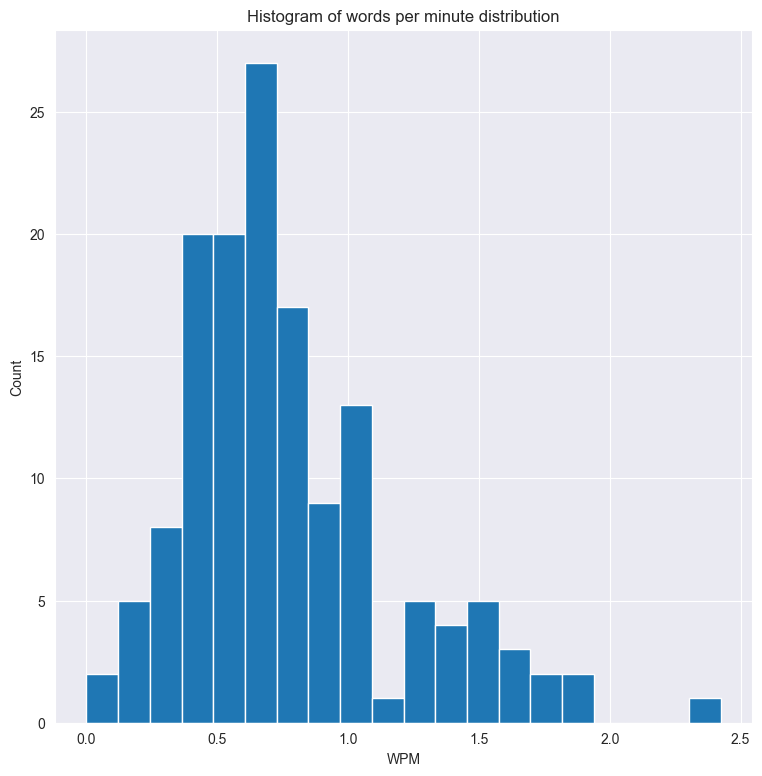

count    144.000000
mean       0.766709
std        0.413901
min        0.000000
25%        0.494448
50%        0.696823
75%        0.968853
max        2.423247
Name: WPM, dtype: float64

In [303]:
plt.figure(figsize=(9,9))
plt.hist(df.WPM, bins=20)
plt.xlabel('WPM')
plt.ylabel('Count')
plt.title('Histogram of words per minute distribution')
plt.show()
display(df.WPM.describe().T)

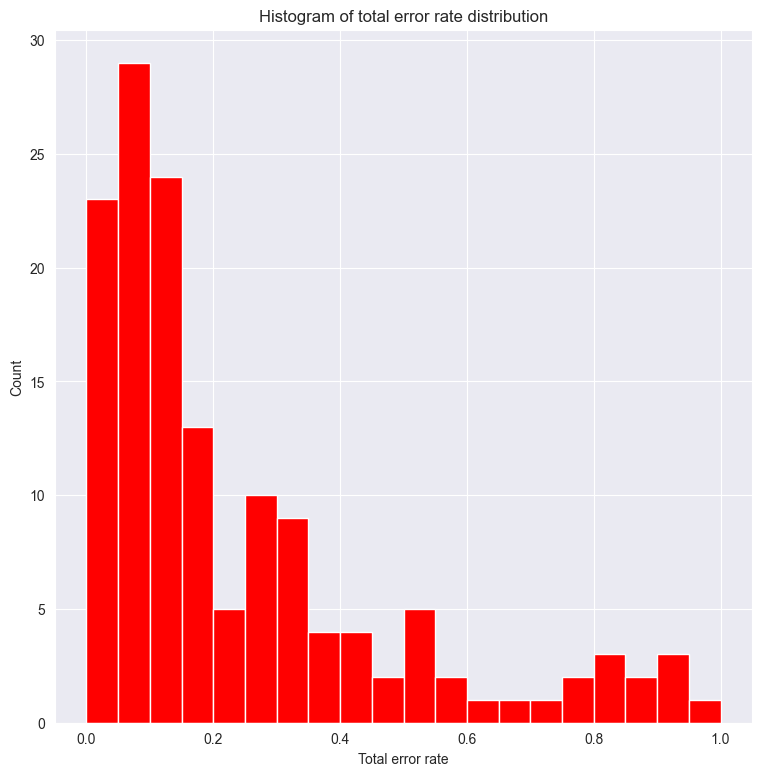

count    144.000000
mean       0.234826
std        0.240691
min        0.000000
25%        0.070813
50%        0.133000
75%        0.312500
max        1.000000
Name: TotErrRate, dtype: float64

In [304]:
plt.figure(figsize=(9,9))
plt.hist(df.TotErrRate, bins=20, color='r')
plt.xlabel('Total error rate')
plt.ylabel('Count')
plt.title('Histogram of total error rate distribution')
plt.show()
display(df.TotErrRate.describe().T)

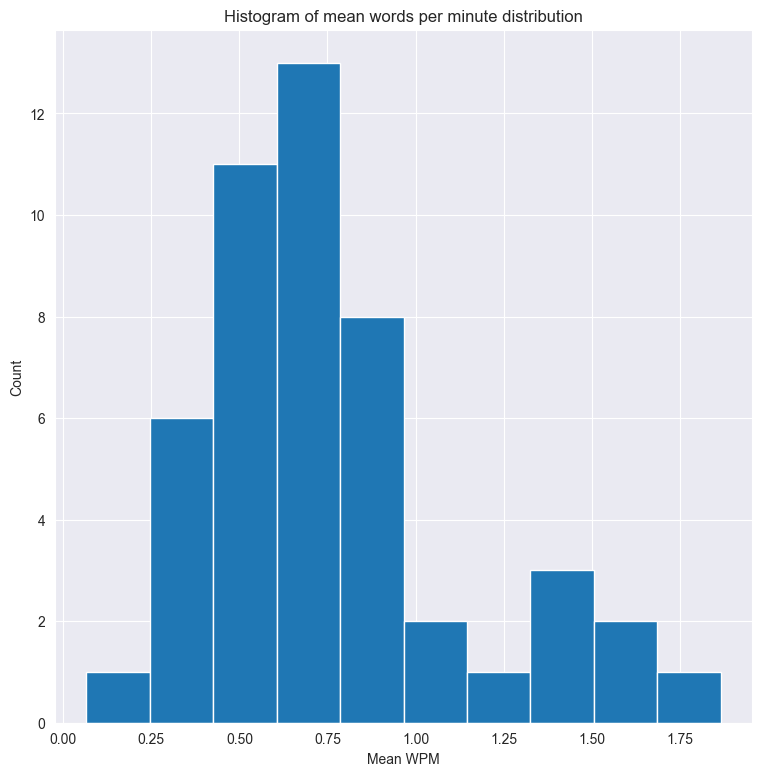

In [305]:
plt.figure(figsize=(9,9))
plt.hist(df_grouped.WPM, bins=10)
plt.xlabel('Mean WPM')
plt.ylabel('Count')
plt.title('Histogram of mean words per minute distribution')
plt.show()

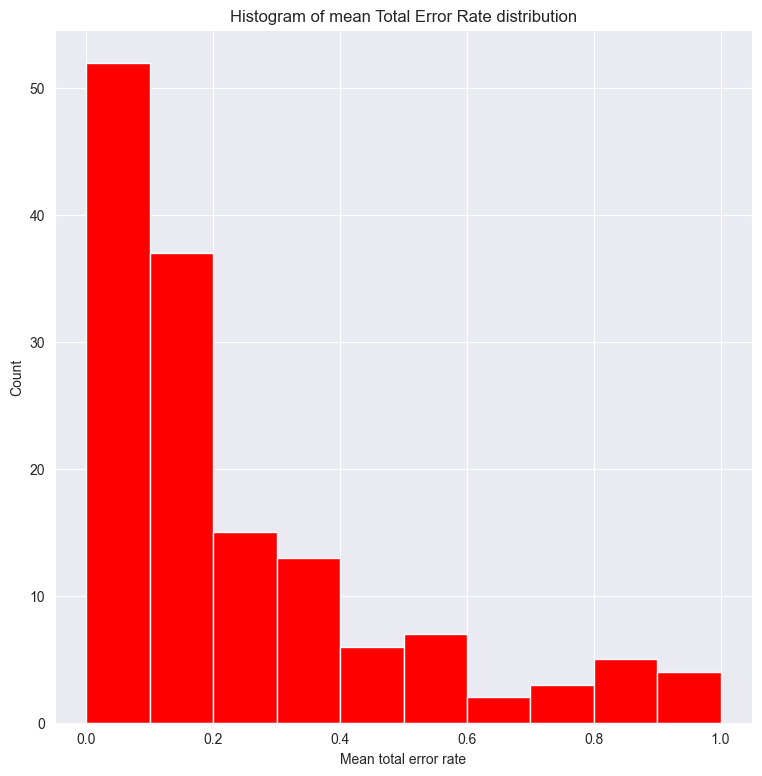

In [306]:
plt.figure(figsize=(9,9))
plt.hist(df.TotErrRate, bins=10, color='r')
plt.xlabel('Mean total error rate')
plt.ylabel('Count')
plt.title('Histogram of mean Total Error Rate distribution')
plt.show()

In [307]:
df_grouped 

,Subject,Keyboard_layout,Input_method,WPM,TotErrRate
0,1,QUADRANT LAYOUT,Free-roam,0.395437,0.194497
1,1,QUADRANT LAYOUT,Left-Right,0.559263,0.104567
2,1,QWERTY LAYOUT,Free-roam,0.825256,0.168478
3,1,QWERTY LAYOUT,Left-Right,0.731102,0.093696
4,2,QUADRANT LAYOUT,Free-roam,0.407968,0.168350
5,2,QUADRANT LAYOUT,Left-Right,0.500654,0.104360
6,2,QWERTY LAYOUT,Free-roam,1.592487,0.537563
7,2,QWERTY LAYOUT,Left-Right,0.645725,0.059608
8,3,QUADRANT LAYOUT,Free-roam,0.746987,0.696970
9,3,QUADRANT LAYOUT,Left-Right,0.473820,0.054627


In [308]:
unique_KL = df_grouped.Keyboard_layout.unique().tolist()
unique_IM = df_grouped.Input_method.unique().tolist()

In [309]:
selection = []
features_combination = []
for KL in unique_KL:
    for IM in unique_IM:
        sel = (df_grouped.WPM.where((df_grouped['Input_method'] == IM) &
                                      (df_grouped['Keyboard_layout'] == KL)).to_frame().dropna().WPM.tolist())
        features_combination.append([KL, IM])
        selection.append(sel)


selection

[[0.39543720589935233,
  0.40796779684644435,
  0.7469867763509996,
  0.3956235899054213,
  0.5705060061004313,
  0.6583333333333333,
  0.6488601971808573,
  0.34732839949882605,
  0.28797016004070297,
  0.5443010386379571,
  0.06581358339313986,
  0.6445992927911923],
 [0.5592628201086677,
  0.5006540294438436,
  0.4738199779309067,
  0.5772068955784877,
  0.515399166390638,
  0.7693333333333333,
  0.8330481501254047,
  0.7791631993810727,
  0.6051569221479757,
  0.3830080534129756,
  0.6746636713863357,
  0.9632970582079047],
 [0.8252558369213764,
  1.5924866480028201,
  1.5895484865605998,
  1.2874583057528266,
  1.1078970573842735,
  0.8306666666666667,
  0.9810414901350607,
  0.8288366601025836,
  1.4353157338639833,
  1.86610995005673,
  1.3458709622687388,
  1.4689314338021167],
 [0.7311018924656243,
  0.6457246663996397,
  0.5930946873333679,
  0.8381364780703427,
  0.7208047163149832,
  0.8343333333333334,
  0.7180916290455284,
  0.5421321364266807,
  0.612203970330467,
  0.80

In [310]:
features_combination

[['QUADRANT LAYOUT', 'Free-roam'],
 ['QUADRANT LAYOUT', 'Left-Right'],
 ['QWERTY LAYOUT', 'Free-roam'],
 ['QWERTY LAYOUT', 'Left-Right']]

[Text(0, 0.5, 'WPM mean'),
 Text(0.5, 0, 'type of keyboard + input method'),
 Text(0.5, 1.0, 'WPM mean over all combinations of input and keyboard layout')]

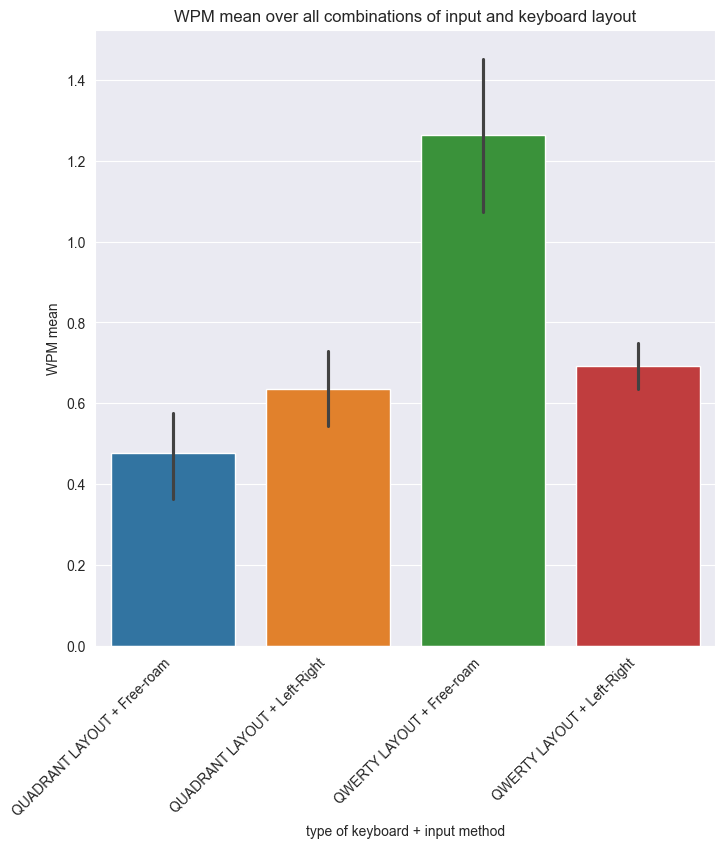

In [311]:
plt.figure(figsize=(8,8))
finalWPM = pd.DataFrame()
name = []
for i, fc in enumerate(features_combination):
    n = features_combination[i][0]+' + '+features_combination[i][1]
    name.append(n)
    finalWPM[n] = selection[i]

ax=sns.barplot(selection)
xtick_loc = ax.get_xticks()
xtick_labels = name

# Set the x-axis ticks
ax.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right')
ax.set(ylabel = 'WPM mean', xlabel = 'type of keyboard + input method', title = 'WPM mean over all combinations of input and keyboard layout')

In [312]:
selection = []
features_combination = []
for KL in unique_KL:
    for IM in unique_IM:
        sel = (df_grouped.TotErrRate.where((df_grouped['Input_method'] == IM) &
                                    (df_grouped['Keyboard_layout'] == KL)).to_frame().dropna().TotErrRate.tolist())
        features_combination.append([KL, IM])
        selection.append(sel)


selection

[[0.19449665831244767,
  0.16835016835016828,
  0.6969696969696967,
  0.31162699193389704,
  0.09451659451659462,
  0.06333333333333334,
  0.06878306878306874,
  0.3611660079051385,
  0.38894830659536567,
  0.17319023569023587,
  0.8854166666666666,
  0.04449275362318841],
 [0.10456697298802574,
  0.10435978247435428,
  0.054626532887402435,
  0.07360722066604407,
  0.23034694773825234,
  0.137,
  0.11989459815546781,
  0.1353184449958643,
  0.21083333333333334,
  0.13083333333333333,
  0.17560664112388255,
  0.08195986622073577],
 [0.16847826086956533,
  0.5375627240143367,
  0.87015873015873,
  0.10469135802469136,
  0.09148550724637679,
  0.17300000000000001,
  0.31481481481481466,
  0.29585139318885467,
  0.26960114412839636,
  0.48809523809523797,
  0.8347141364382743,
  0.3486590038314177],
 [0.09369557645419725,
  0.059607843137254896,
  0.1768115942028987,
  0.07,
  0.11465517241379308,
  0.06766666666666667,
  0.27681159420289864,
  0.21321914800175648,
  0.05370370370370366,


In [313]:
features_combination

[['QUADRANT LAYOUT', 'Free-roam'],
 ['QUADRANT LAYOUT', 'Left-Right'],
 ['QWERTY LAYOUT', 'Free-roam'],
 ['QWERTY LAYOUT', 'Left-Right']]

[Text(0, 0.5, 'Error rate mean'),
 Text(0.5, 0, 'type of keyboard + input method'),
 Text(0.5, 1.0, 'Error rate mean over all combinations of input and keyboard layout')]

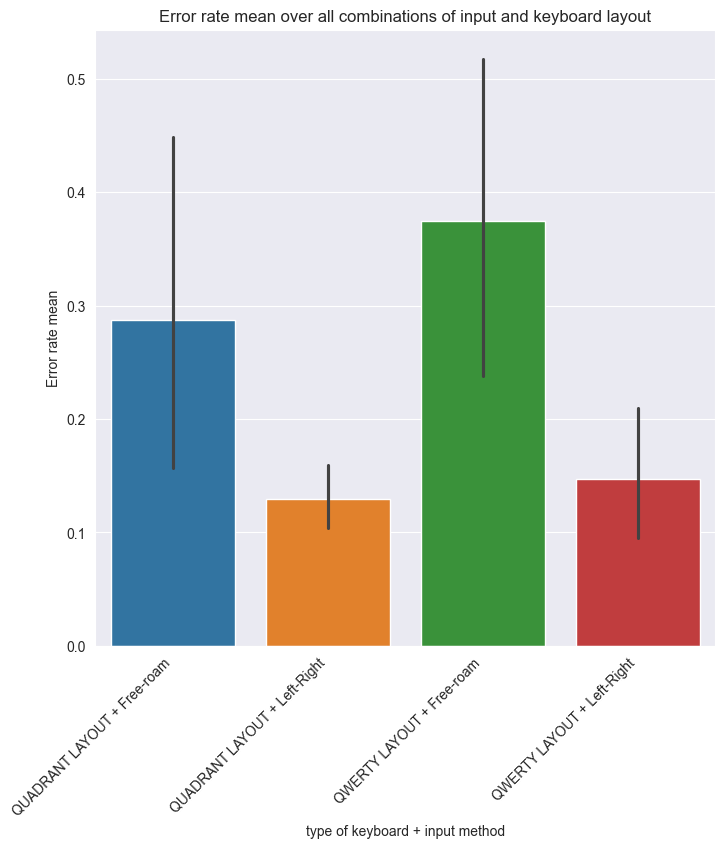

In [314]:
plt.figure(figsize=(8,8))
finalTER = pd.DataFrame()
name = []
for i, fc in enumerate(features_combination):
    n = features_combination[i][0]+' + '+features_combination[i][1]
    name.append(n)
    finalTER[n] = selection[i]


ax=sns.barplot(selection)
xtick_loc = ax.get_xticks()
xtick_labels = name

# Set the x-axis ticks
ax.set_xticks(ticks = xtick_loc, labels = xtick_labels, rotation = 45, ha = 'right')
ax.set(ylabel = 'Error rate mean', xlabel = 'type of keyboard + input method', title = 'Error rate mean over all combinations of input and keyboard layout')

In [315]:
finalWPM

,QUADRANT LAYOUT + Free-roam,QUADRANT LAYOUT + Left-Right,QWERTY LAYOUT + Free-roam,QWERTY LAYOUT + Left-Right
0,0.395437,0.559263,0.825256,0.731102
1,0.407968,0.500654,1.592487,0.645725
2,0.746987,0.473820,1.589548,0.593095
3,0.395624,0.577207,1.287458,0.838136
4,0.570506,0.515399,1.107897,0.720805
5,0.658333,0.769333,0.830667,0.834333
6,0.648860,0.833048,0.981041,0.718092
7,0.347328,0.779163,0.828837,0.542132
8,0.287970,0.605157,1.435316,0.612204
9,0.544301,0.383008,1.866110,0.805735


In [316]:
finalTER

,QUADRANT LAYOUT + Free-roam,QUADRANT LAYOUT + Left-Right,QWERTY LAYOUT + Free-roam,QWERTY LAYOUT + Left-Right
0,0.194497,0.104567,0.168478,0.093696
1,0.168350,0.104360,0.537563,0.059608
2,0.696970,0.054627,0.870159,0.176812
3,0.311627,0.073607,0.104691,0.070000
4,0.094517,0.230347,0.091486,0.114655
5,0.063333,0.137000,0.173000,0.067667
6,0.068783,0.119895,0.314815,0.276812
7,0.361166,0.135318,0.295851,0.213219
8,0.388948,0.210833,0.269601,0.053704
9,0.173190,0.130833,0.488095,0.116830


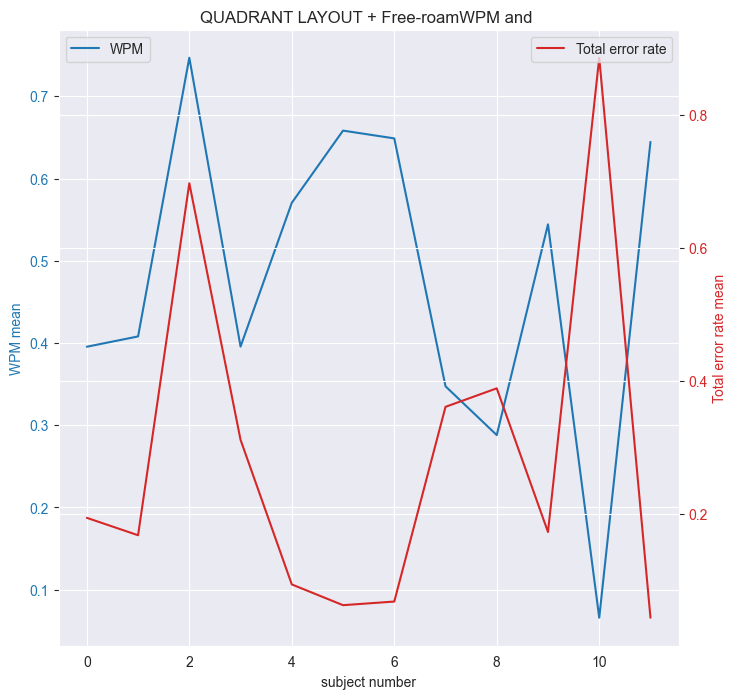

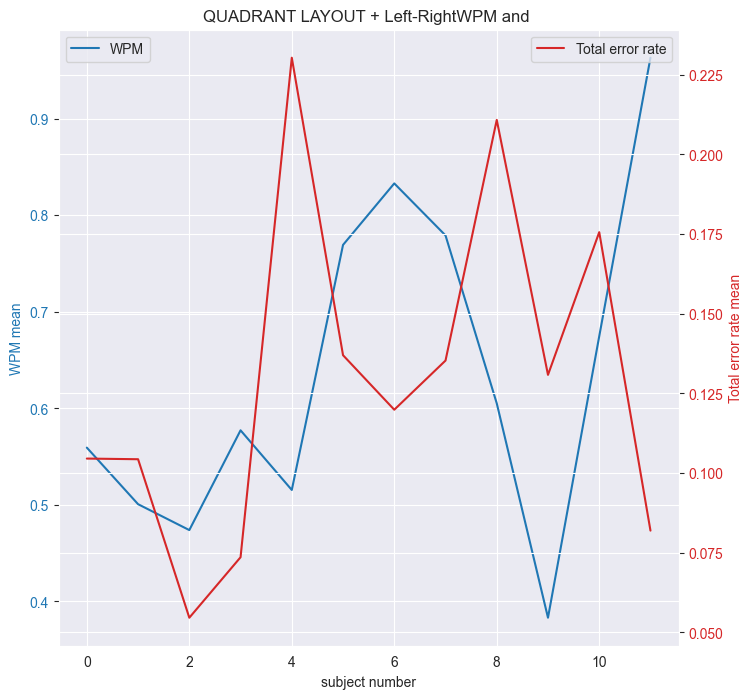

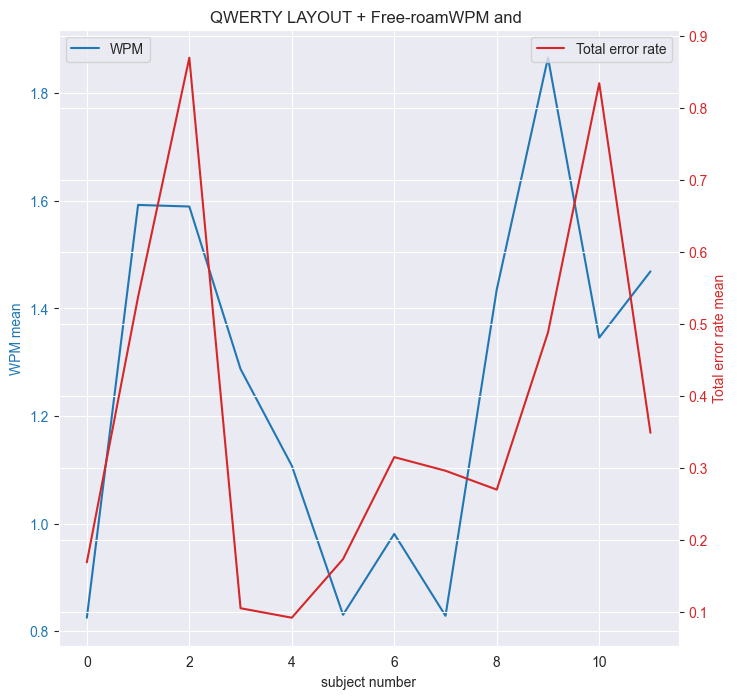

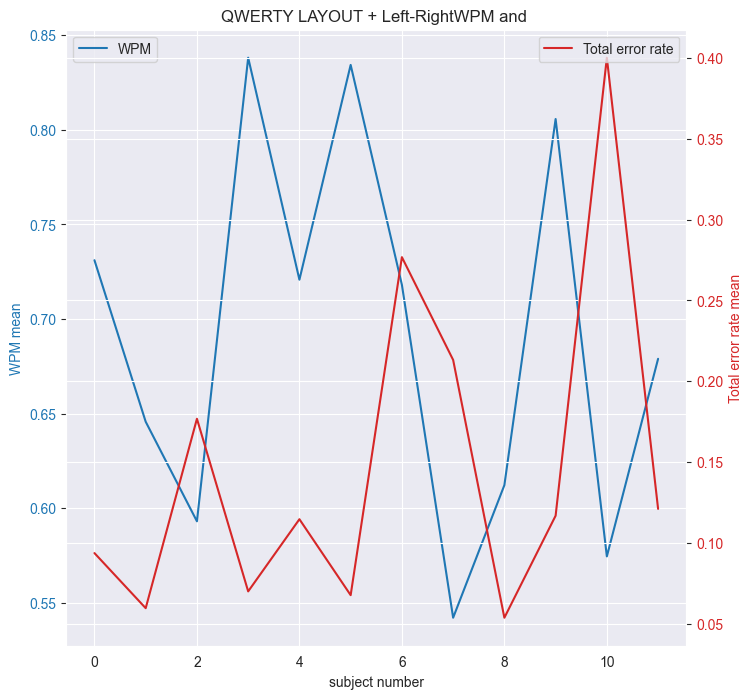

In [317]:
for i in range(4):
    x = range(0,12)
    y1 = finalWPM[name[i]].tolist()
    y2 = finalTER[name[i]].tolist()
    
    # Creating figure and axis objects
    fig, ax1 = plt.subplots(figsize=(8, 8))
    
    # Plotting the first line
    color = 'tab:blue'
    ax1.set_xlabel('subject number')
    ax1.set_ylabel('WPM mean', color=color)
    ax1.plot(x, y1, color=color, label = 'WPM')
    ax1.tick_params(axis='y', labelcolor=color)
    
    # Creating a second y-axis
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Total error rate mean', color=color)
    ax2.plot(x, y2, color=color, label = 'Total error rate')
    ax2.tick_params(axis='y', labelcolor=color)
    
    # Adding a title
    plt.title(name[i]+'WPM and ')
    ax2.legend(loc='upper right')
    ax1.legend(loc='upper left')
    # Show plot
    plt.show()